# Derivation of DRT

For known transfer function (impedance model) $Z(j\omega)$ the distribution of relaxation times can be obtained in closed form as:

$
G(u) = -\frac{1}{\pi}\left( \Im\left\{ Z\left( \exp\left(-u-i\frac{\pi}{2}\right) \right) \right\} + \Im\left\{ Z\left( \exp\left(-u+i\frac{\pi}{2}\right) \right) \right\} 
\right)
$

This can be easily implemented using ```sympy``` package from Python.

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
[w, t]=sp.symbols('omega T',positive=True)
s_R = []
s_alpha = []
s_tau = []
s_Rs = sp.symbols('Rs', positive=True)
n_dim = 1

R = sp.symbols(f'R', positive=True)
alpha = sp.symbols(f'alpha', positive=True)
tau = sp.symbols(f'tau', positive=True)

s_Z = s_Rs + R/(1+(tau*sp.I*w)**alpha)

s_drt =-1/sp.pi*( sp.im(s_Z.subs(w,sp.exp(-t-sp.I*sp.pi/2)))+sp.im(s_Z.subs(w,sp.exp(-t+sp.I*sp.pi/2) )))
drt =-1/sp.pi*( sp.im(s_Z.subs(w,sp.exp(-t-sp.I*sp.pi/2)))+sp.im(s_Z.subs(w,sp.exp(-t+sp.I*sp.pi/2) )))

In [3]:
s_Z

R/((I*omega*tau)**alpha + 1) + Rs

In [4]:
drt.subs((-1)**alpha,sp.exp(-1*sp.I*sp.pi*alpha)).simplify()

-R*tau**alpha*exp(T*alpha)*sin(pi*alpha)/(pi*(tau**(2*alpha) + 2*tau**alpha*exp(T*alpha)*cos(pi*alpha) + exp(2*T*alpha)))

# Pole importance through DRT

In [5]:
def get_drt_f(Rs, R, tau, alfa, n_dim):
    [w, t]=sp.symbols('omega T',positive=True)
    s_R = []
    s_alpha = []
    s_tau = []
    s_Rs = sp.symbols('Rs', positive=True)
    for poles in range(n_dim):
        s_R.append(sp.symbols(f'R_{poles}', positive=True))
        s_alpha.append(sp.symbols(f'alpha_{poles}', positive=True))
        s_tau.append(sp.symbols(f'tau_{poles}', positive=True))

    s_Z = s_Rs + sum([s_R[i]/(1+(s_tau[i]*sp.I*w)**s_alpha[i]) for i in range(n_dim)])


    s_drt =-1/sp.pi*( sp.im(s_Z.subs(w,sp.exp(-t-sp.I*sp.pi/2)))+sp.im(s_Z.subs(w,sp.exp(-t+sp.I*sp.pi/2) )))
    drt_f = s_drt.subs(s_Rs,Rs)#.subs(s_alpha[0],0.8).subs(s_R[0],1).subs(s_tau[0],2.8)

    # # drt_f = s_drt.subs(s_Rs,Rs_t).subs(s_R[0],.25e-2).subs(s_tau[0],50).subs(s_alpha[0],0.9)


    for i in range(n_dim):
        drt_f = drt_f.subs(s_R[i],R[i])
        drt_f = drt_f.subs(s_alpha[i],alfa[i])
        drt_f = drt_f.subs(s_tau[i],tau[i])
    return sp.lambdify(t,drt_f,"numpy")

In [7]:
f_e = get_drt_f( 2e-3, [1.], [.005], [.9], 1)
f_e2 = get_drt_f( 2e-3, [1.], [1.], [.6], 1)
f_e3 = get_drt_f( 2e-3, [.5], [.0007], [.6], 1)

sp_tau = np.logspace(-5,3,1000)
sp_T = np.log(sp_tau)
inter = np.power(sp_tau, -1)
sp_tau_int = np.linspace(inter.min(), inter.max(), 1000)

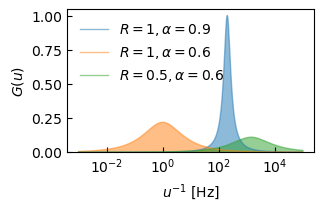

In [8]:
fig = plt.figure(figsize=(6.25/2,4/2))
fig.set_constrained_layout(True)
plt.semilogx(np.power(sp_tau,-1),f_e(sp_T),label=r'$R=1,\alpha=0.9$',linewidth=1,alpha=.5)
plt.semilogx(np.power(sp_tau,-1),f_e2(sp_T),label=r'$R=1,\alpha=0.6$',linewidth=1,alpha=.5)
plt.semilogx(np.power(sp_tau,-1),f_e3(sp_T),label=r'$R=0.5,\alpha=0.6$',linewidth=1,alpha=.5)
plt.fill_between(np.power(sp_tau,-1),f_e(sp_T),linewidth=1,alpha=.5)
plt.fill_between(np.power(sp_tau,-1),f_e2(sp_T),linewidth=1,alpha=.5)
plt.fill_between(np.power(sp_tau,-1),f_e3(sp_T),linewidth=1,alpha=.5)


plt.xscale('log')
plt.ylim(0,1.05)
plt.minorticks_off()
plt.tick_params(axis='both', which='both', direction='in')
plt.xlabel(r'$u^{-1}$ [Hz]')
plt.ylabel(r'$G(u)$')
plt.legend(loc='upper left',frameon=False)